## plot_emg data

TypeError: can't multiply sequence by non-int of type 'float'

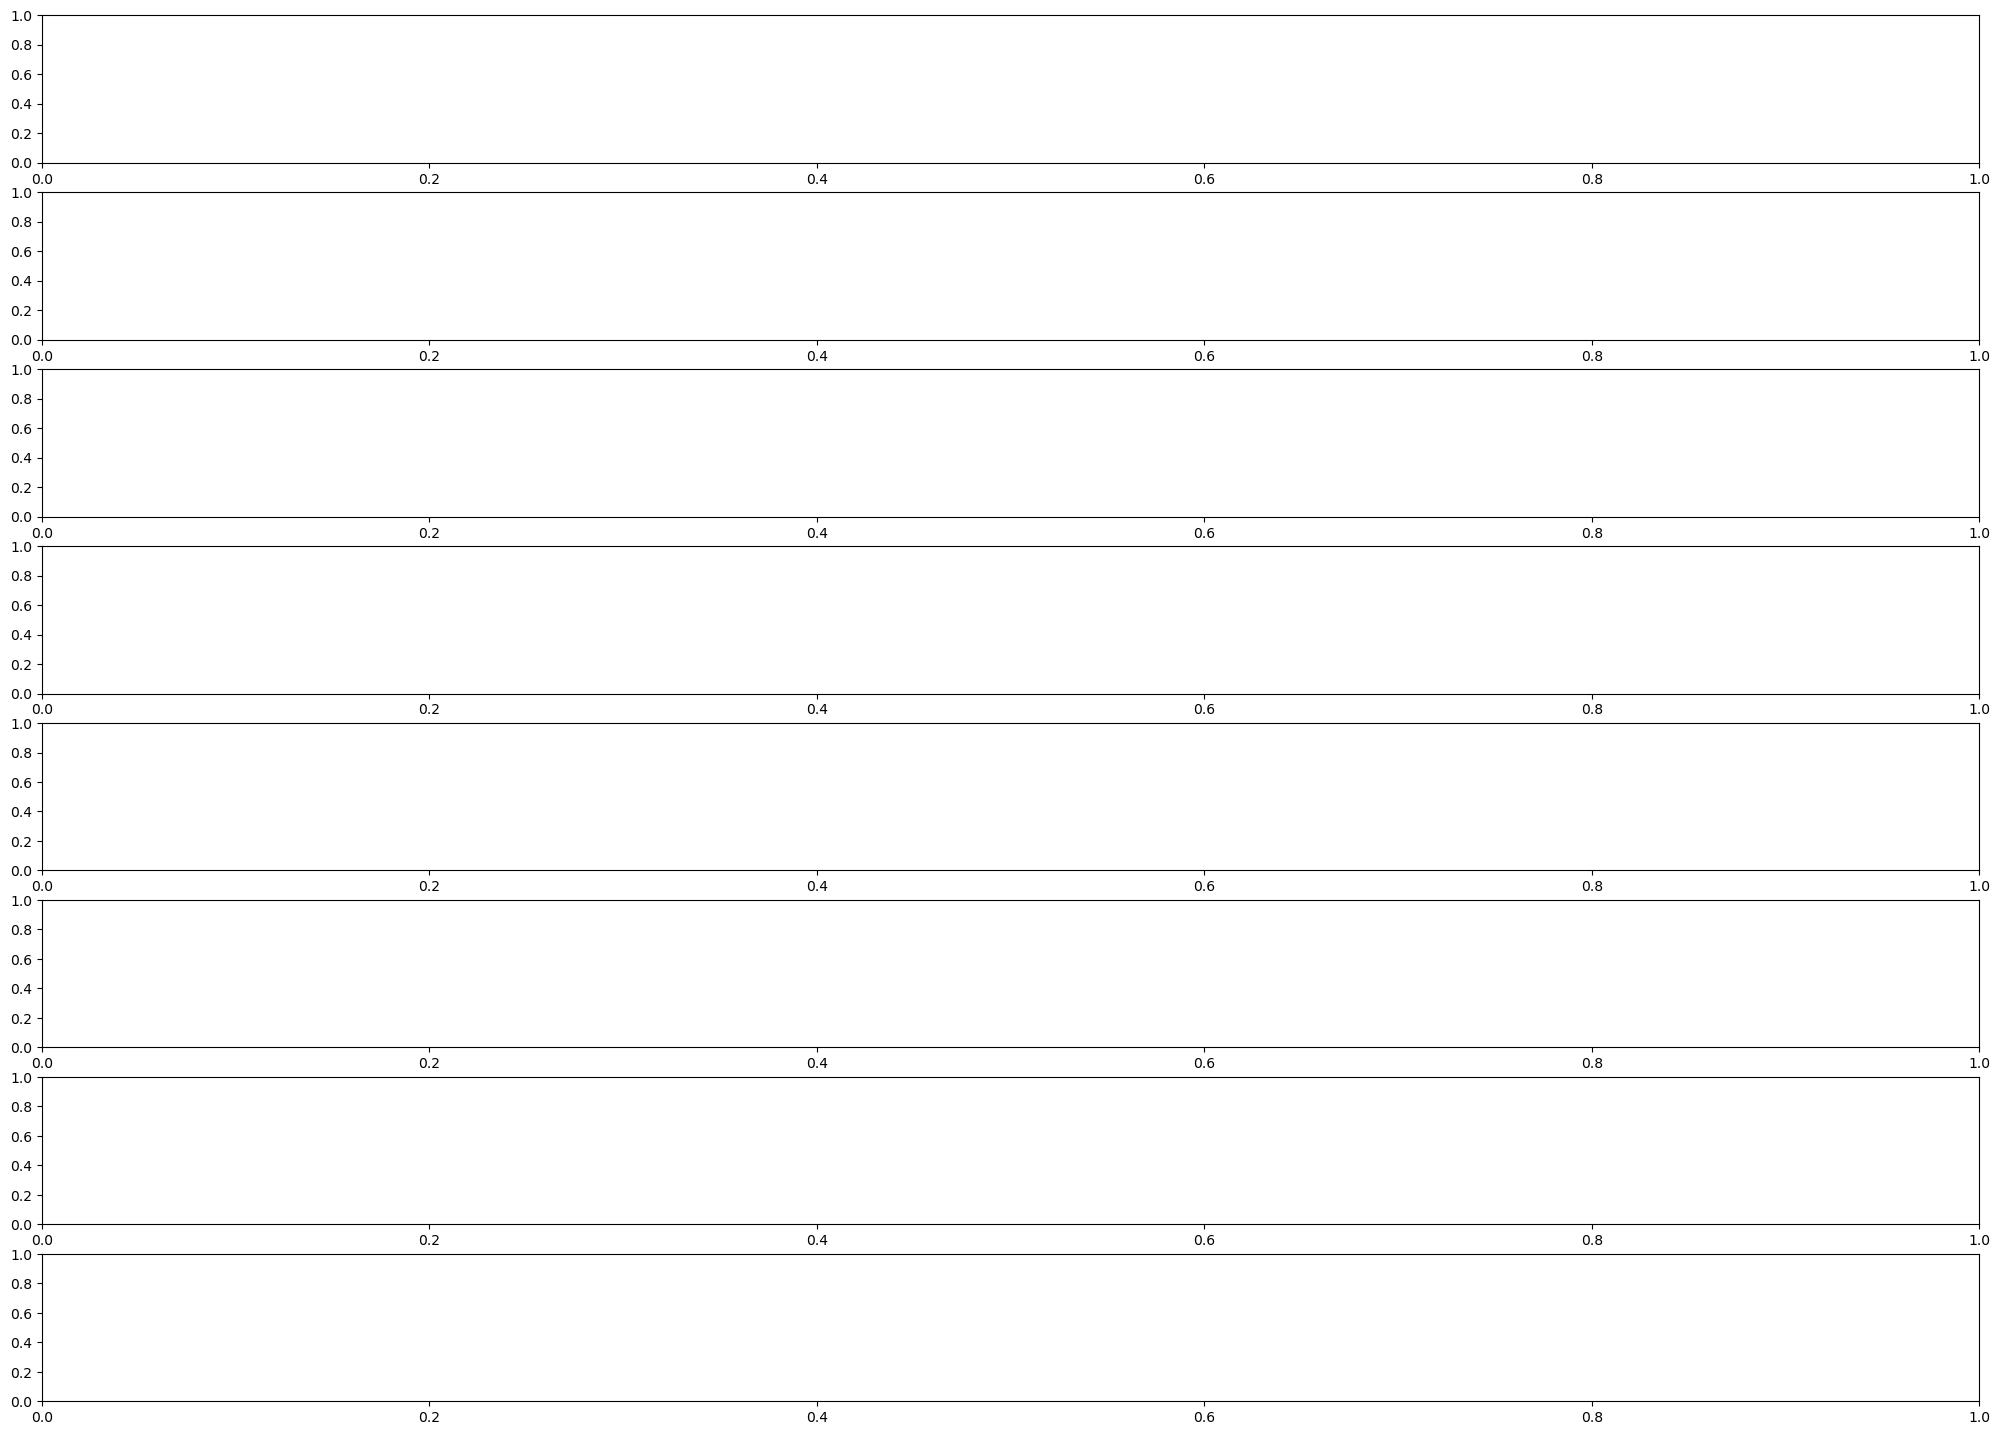

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/data_eeg.csv")
# Create a single figure with subplots
fig, axes = plt.subplots(8, 1, figsize=(25, 18))

for row in range(0, 8):
    data = []
    for x in range(df.shape[1]):
        data.append(df.iloc[row, x])

    axes[row].plot(data*0.000000045)  # Use the respective subplot for each row
    axes[row].set_title(f"Channel {row + 1} 25 frames per seconds")

plt.show()

### FFT of emg

Text(0.5, 1.0, 'Channel 0 FFT')

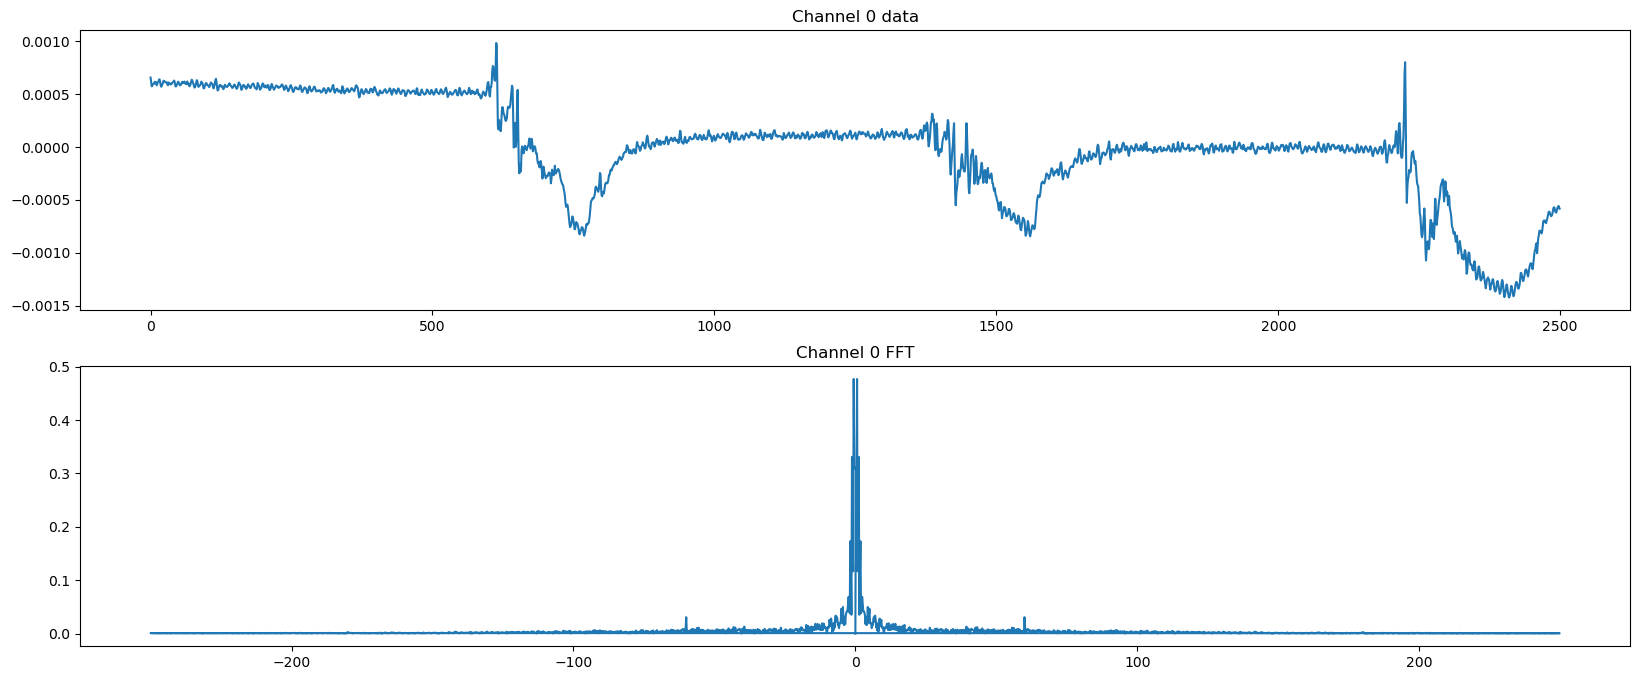

In [4]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/data_eeg.csv")

fig, axes = plt.subplots(2, 1, figsize=(20, 8))

data = df.iloc[0,:].tolist()
data = np.array(data)
data = data * 0.000000045
mean = np.mean(data)
data = data - mean

axes[0].plot(data)
axes[0].set_title("Channel 0 data")

fft_result = np.fft.fft(data)
mag = np.abs(fft_result)

sampling_freq = 500  # Example sampling frequency in Hz
freq = np.fft.fftfreq(len(data), d=1.0/sampling_freq)

axes[1].plot(freq, mag)
axes[1].set_title("Channel 0 FFT")




### plot armband imu data

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/data_imu.csv")

fig, ax = plt.subplots(3, 1, figsize=(20,10))

x=df.iloc[0].values
y=df.iloc[1].values
z=df.iloc[2,220:-1].values


ax[0].plot(x)
ax[0].set_title("armband x")

ax[1].plot(y)
ax[1].set_title("armband y")

ax[2].plot(z*.000061035)
ax[2].set_title("armband z")

plt.show()

EmptyDataError: No columns to parse from file

## plot shimmer imu

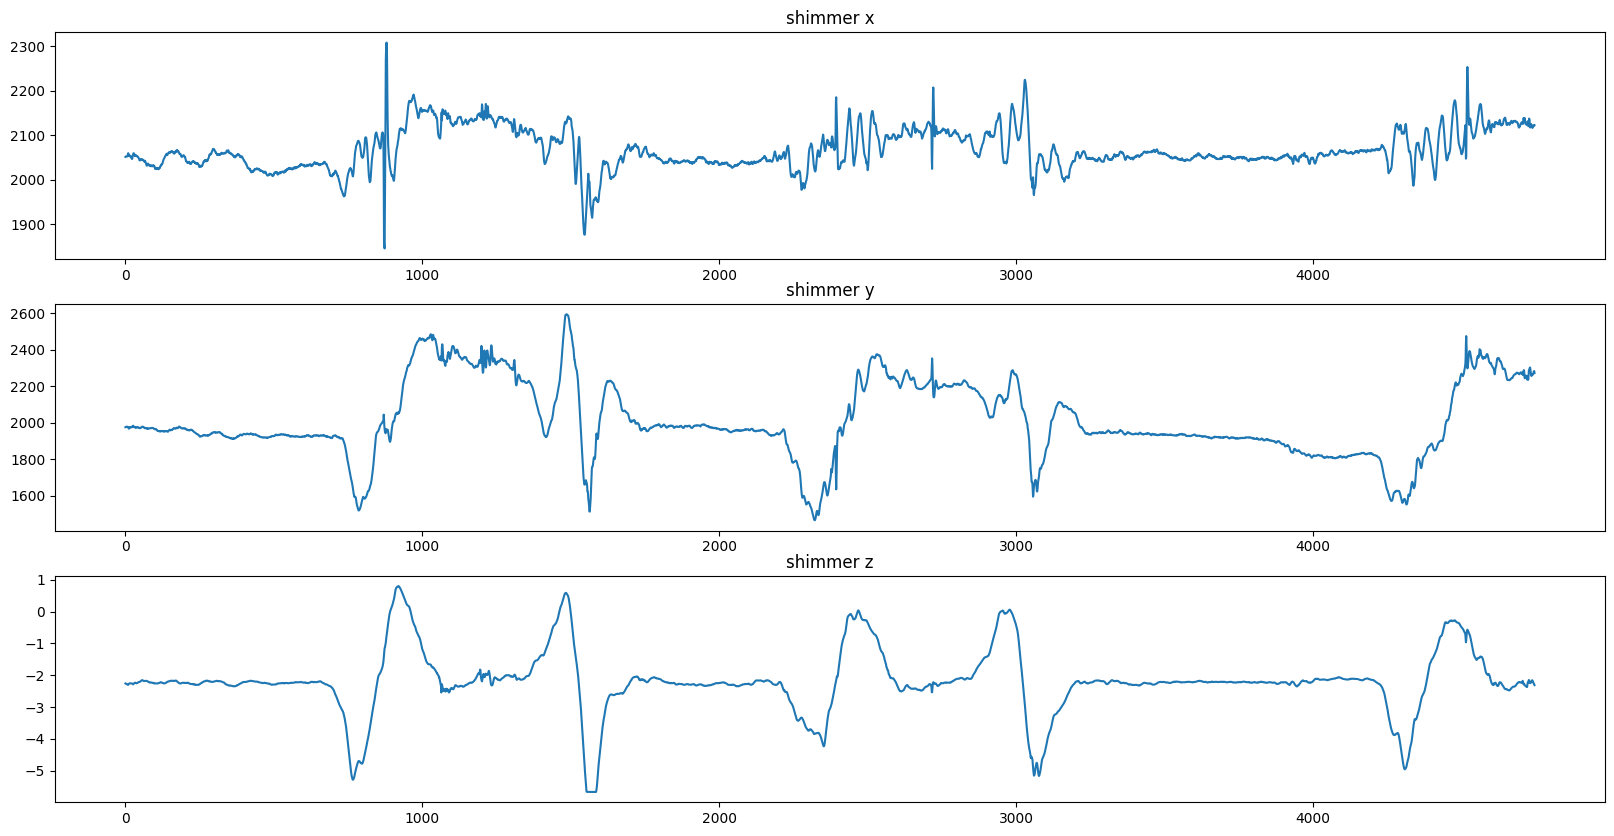

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/shimmer_data.csv")
df

fig, ax = plt.subplots(3, 1, figsize=(20,10))

x=df.iloc[0].values
y=df.iloc[1].values
z=df.iloc[2].values


ax[0].plot(x)
ax[0].set_title("shimmer x")

ax[1].plot(y)
ax[1].set_title("shimmer y")

ax[2].plot((z - 2084)/367.5)
ax[2].set_title("shimmer z")

# 4096

plt.show()

2066 2062 1681


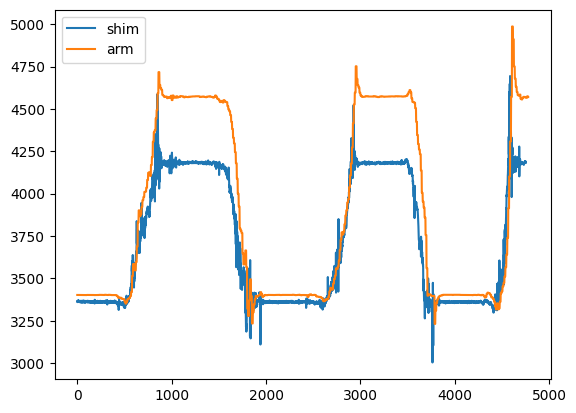

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

shim = pd.read_csv("data/shimmer_data.csv")
arm = pd.read_csv("data/data_imu.csv")

shim_z=shim.iloc[2].values
arm_z=arm.iloc[2,220:-1].values

# fig, ax = plt.subplots(3, 1, figsize=(20,10))

plt.plot(shim_z*2)
plt.plot((arm_z*-0.07)+4500)
plt.legend(["shim","arm"])

# shim_x=shim.iloc[2,200].values
x = 200
shim_x=shim.iloc[0,x]
shim_y=shim.iloc[1,x]
shim_z=shim.iloc[2,x]
print(shim_x, shim_y, shim_z)

#1681 = +-9.8
#2060 = 0



## denoise using rolling function

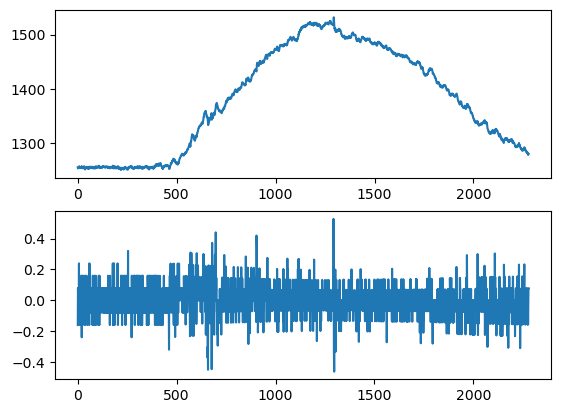

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/shimmer_data.csv")

x=df.iloc[0].values
y=df.iloc[1].values
z=df.iloc[2].values

pct_z = df.iloc[2].rolling(window=5).mean().values

fig, ax = plt.subplots(2,1, figsize = (20,10))

ax[0].plot(z)
ax[1].plot(pct_z)



plt.show()

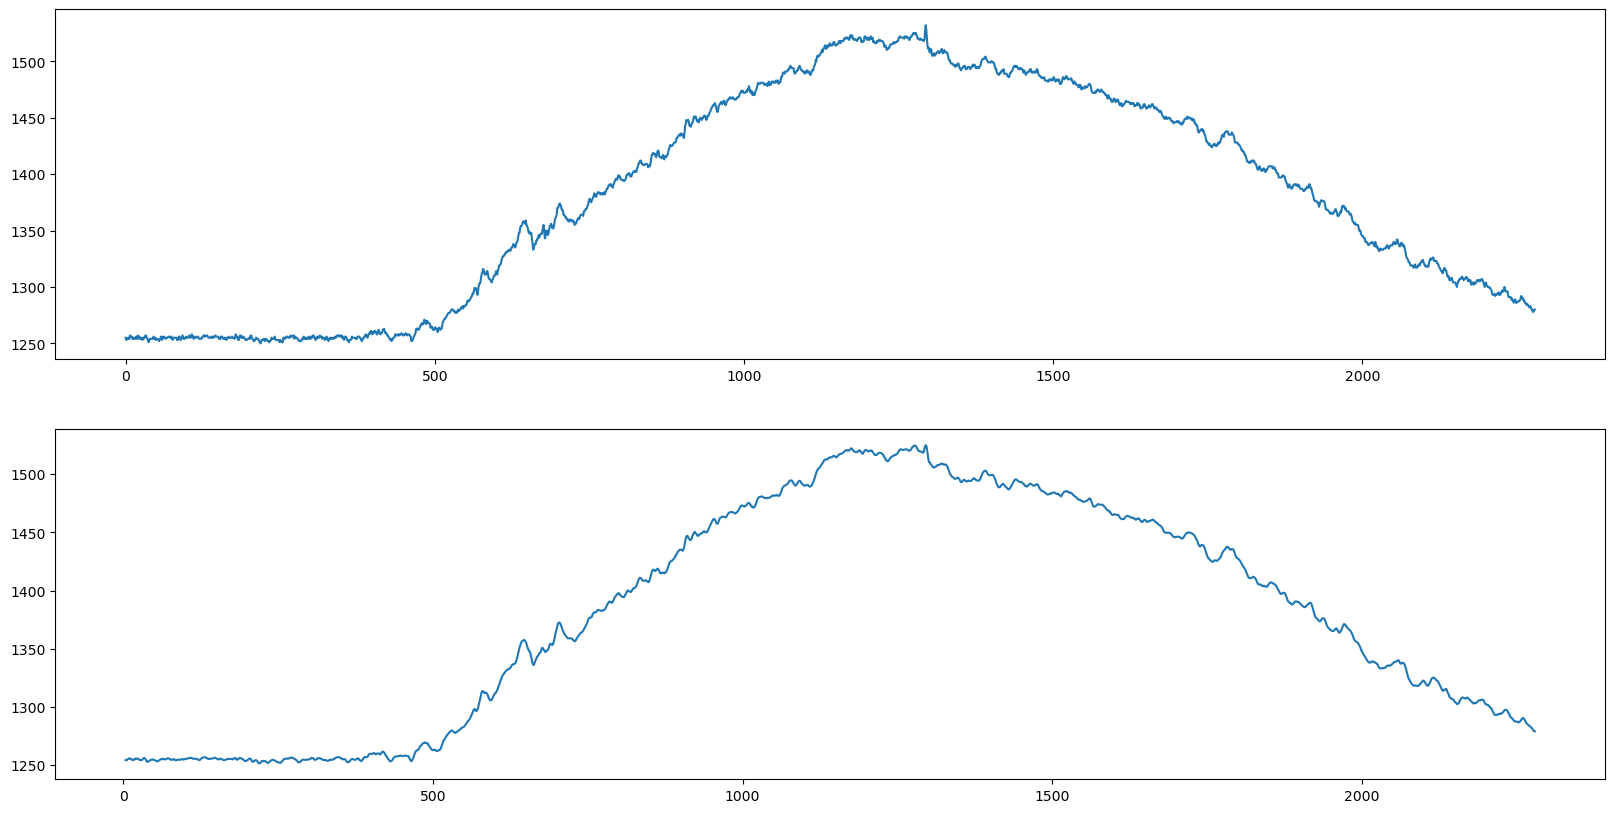

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/shimmer_data.csv")

x=df.iloc[0].values
y=df.iloc[1].values
z=df.iloc[2].values

pct_z = df.iloc[2].rolling(window=5).mean().values

fig, ax = plt.subplots(2,1, figsize = (20,10))

ax[0].plot(z)
ax[1].plot(pct_z)



plt.show()